# Homework: Cluster validation indices

| Student Name         | Student-ID |
|----------------------|------------|
| Marco Di Francesco   | 100632815  |
| Loreto García Tejada | 100643862  |
| György Bence Józsa   | 100633270  |
| József-Hunor Jánosi  | 100516724  |
| Sara-Jane Bittner    | 100498554  |

_Learning goal: To study different cluster validation indices on different datasets and different
clusterings._

In this task, you should study two internal clustering validation indices, **Silhouette index
(SI)** and **Davies-Bouldin index (DB)**, and one external index, **Normalized Mutual
Information (NMI)**, the version by Strehl and Ghosh, 2003 (see the slides of lecture 5).

Load two data sets, “balls.txt” and “spirals.txt”. Both are two-dimensional data, where
the third feature component (“class”) contains the ground-truth labels. Remember to discard
the label while running the clustering algorithms!

a) Cluster “balls.txt” with i) $K$-means and ii) hierarchical single linkage clustering, both
using the Euclidean distance measure.

Use values $K = 2, \dots , 5$ in $K$-means and similarly cut the dendrogram in $2, \dots , 5$
clusters. Plot the data points with different colors to visualize all your clustering results.

Determine the optimal number of clusters for both methods using all three indices SI,
DB and NMI. Report the results as a table.

Which clustering method and $K$ value seem to be the best for the data i) based on the
validation indices and ii) by visual observation?

In [32]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



In [33]:
balls = pd.read_csv('balls.txt')
balls.head()

,X,Y,class
0,-6.244,6.6637,0
1,-8.194,7.5372,0
2,1.732,-0.6362,2
3,-6.137,-5.1643,1
4,-7.424,6.4897,0


In [53]:
def compute_metrics(df):
    metrics_dict = {
        "cluster_n": [],
        "SI": [],
        "DB": []
        # ,'NMI': []
    }

    for i in range(2,6):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df)

        metrics_dict['cluster_n'].append(i)
        metrics_dict['SI'].append(metrics.silhouette_score(df, kmeans.labels_, metric='euclidean'))
        metrics_dict['DB'].append(metrics.davies_bouldin_score(df, kmeans.labels_))
        #metrics_dict['NMI'].append(metrics.normalized_mutual_info_score(df, kmeans.labels_, average_method='euclidean'))

        plt.scatter(df['X'], df['Y'], c=kmeans.labels_)
        plt.title('K-means, K value = %d' %i)
        plt.show()
    return metrics_dict

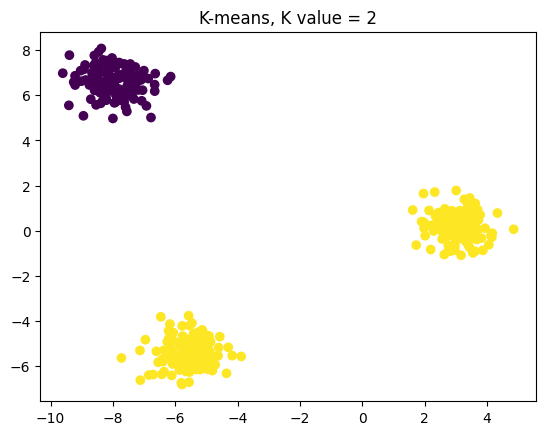

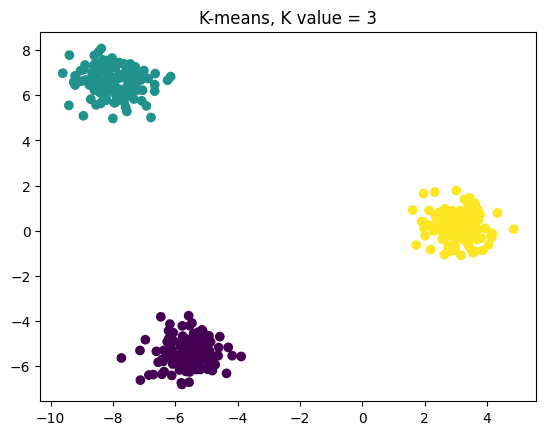

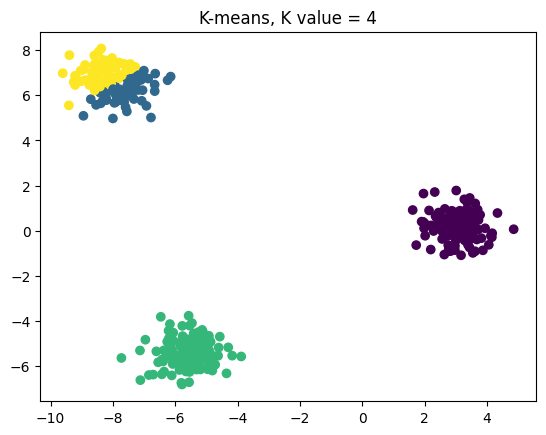

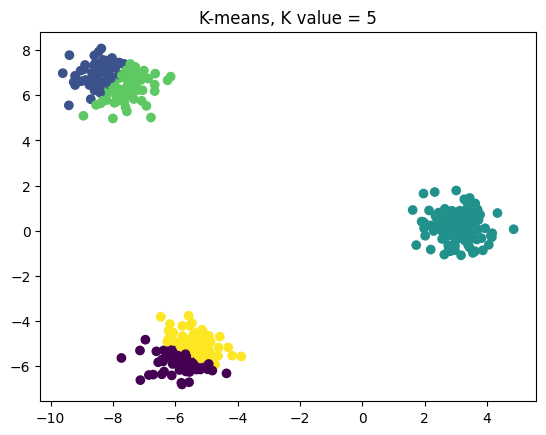

In [54]:
balls_noClass = balls.drop(labels="class", axis=1)
balls_metrics = compute_metrics(balls_noClass)

In [55]:
balls_metrics = pd.DataFrame.from_dict(balls_metrics)
balls_metrics.set_index("cluster_n")

,SI,DB
cluster_n,,
2,0.668003,0.522808
3,0.901541,0.135897
4,0.710029,0.652815
5,0.511778,0.972124


## Balls - hierarchical

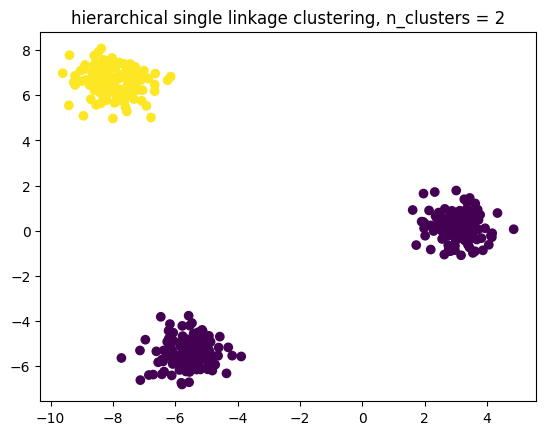

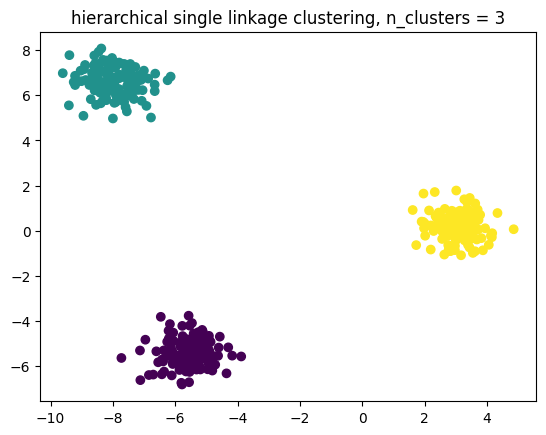

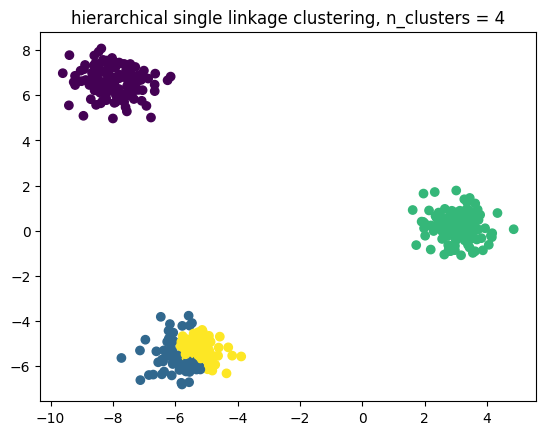

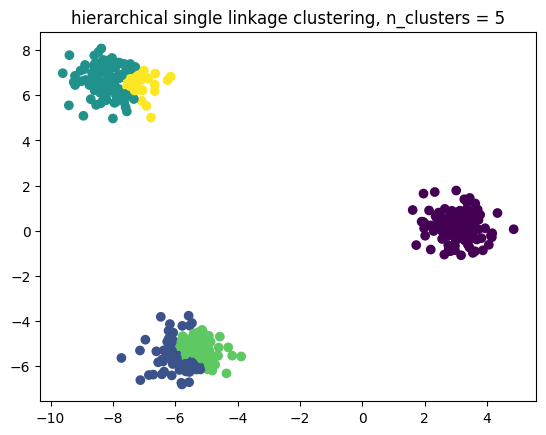

In [38]:
for i in range(2,6):
    agClus = AgglomerativeClustering(n_clusters=i, linkage="complete",affinity='euclidean' )
    agClus.fit(balls_noClass)   

    plt.scatter(balls_noClass['X'], balls_noClass['Y'], c=agClus.labels_)
    plt.title('hierarchical single linkage clustering, n_clusters = %d' %i)
    plt.show()

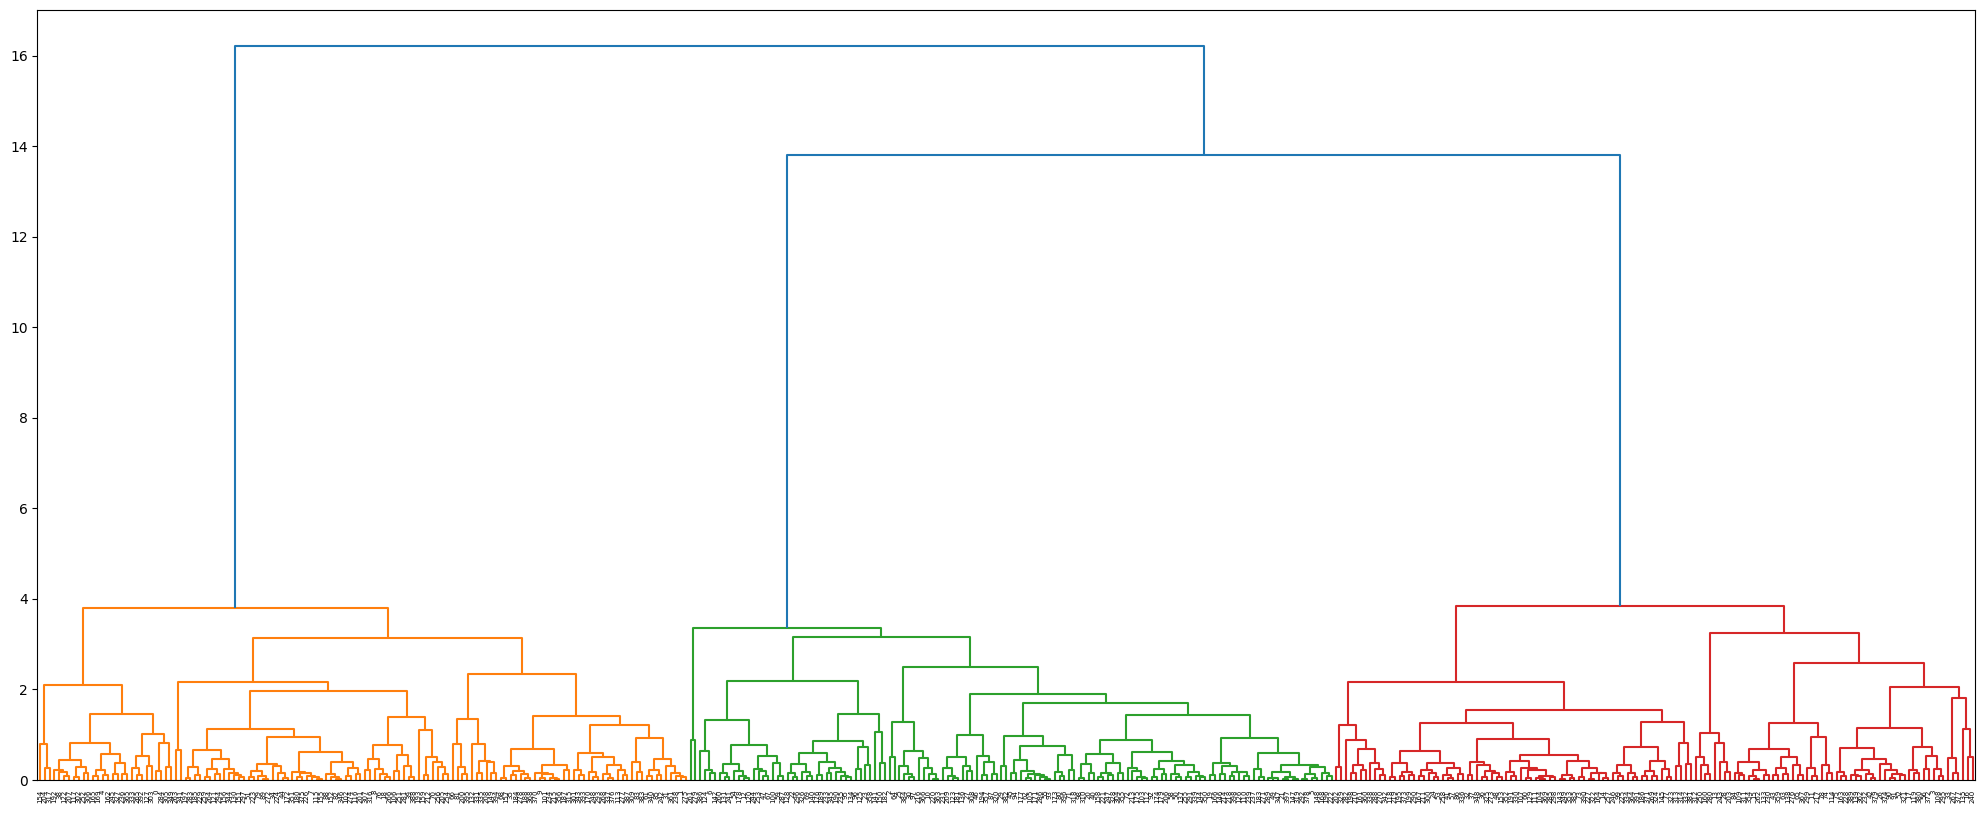

In [46]:
Z = linkage(balls_noClass, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## Sprirals - k-means

b) Repeat all steps of a) for “spirals.txt”.

In [40]:
spirals = pd.read_csv('spirals.txt')
spirals.head()

,X,Y,class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [41]:
spirals_noClass = spirals.drop(labels="class", axis=1)

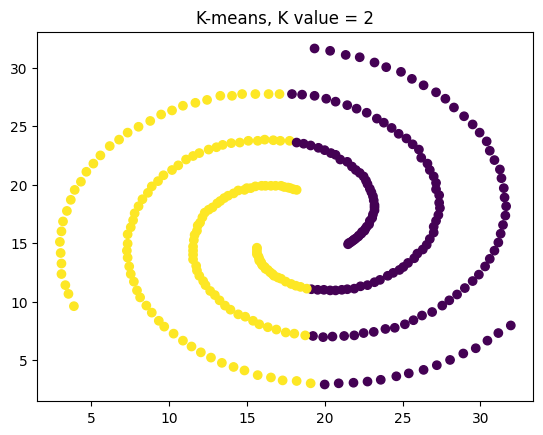

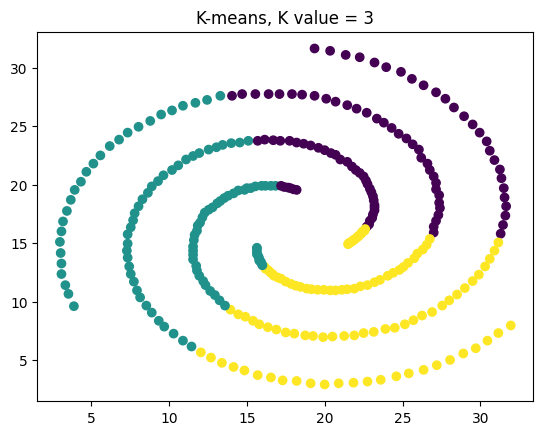

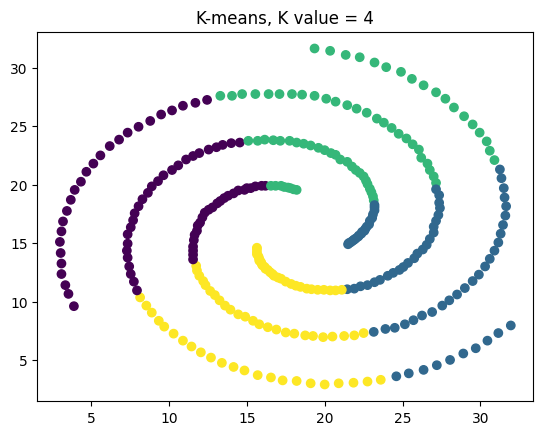

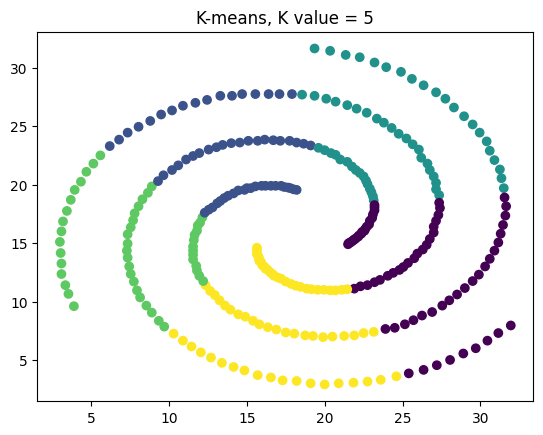

In [42]:
for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(spirals_noClass)

    plt.scatter(spirals_noClass['X'], spirals_noClass['Y'], c=kmeans.labels_)
    plt.title('K-means, K value = %d' %i)
    plt.show()

## Sprirals - hierarchical

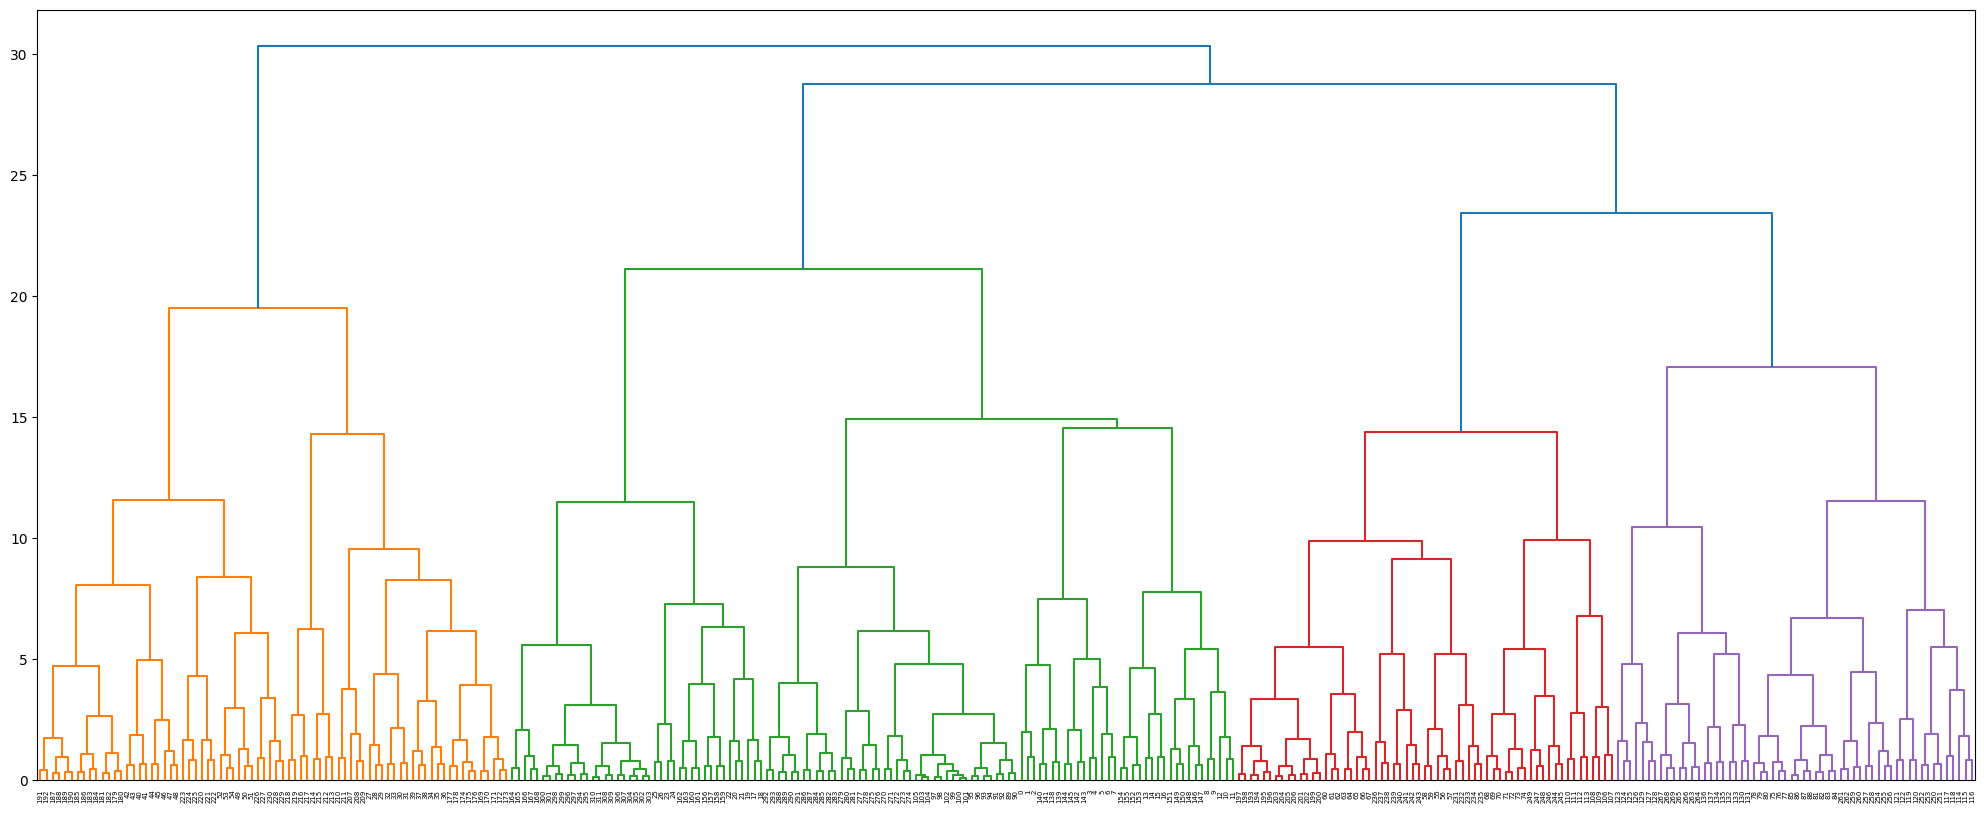

In [43]:
Z = linkage(spirals_noClass, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

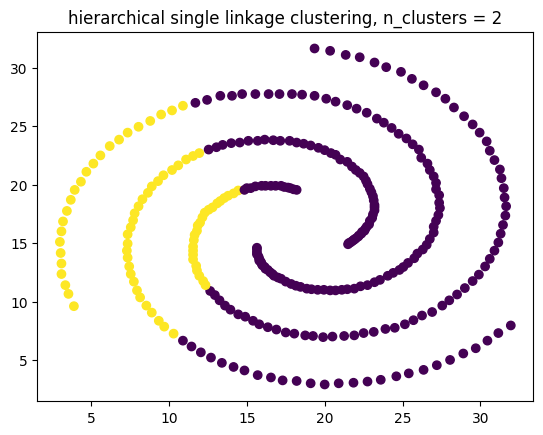

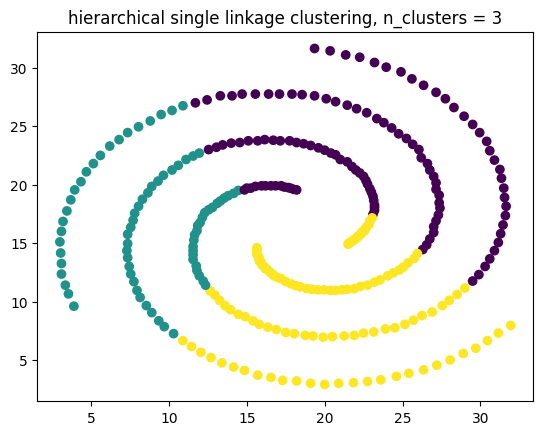

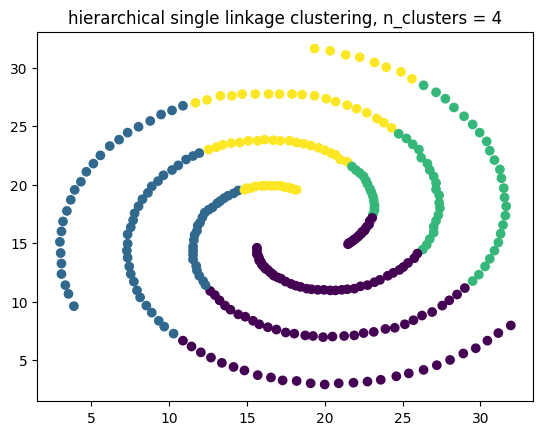

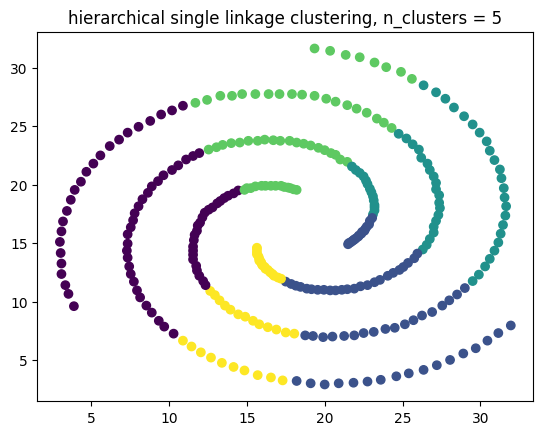

In [44]:
for i in range(2,6):
    agClus = AgglomerativeClustering(n_clusters=i, linkage="complete",affinity='euclidean' )
    agClus.fit(spirals_noClass)   

    plt.scatter(spirals_noClass['X'], spirals_noClass['Y'], c=agClus.labels_)
    plt.title('hierarchical single linkage clustering, n_clusters = %d' %i)
    plt.show()



c) Explain and analyze your observations. Which index captured the performance of the
clustering algorithm most accurately? Why some indices might have failed to reflect
good performance?